In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

#  Załadowanie zestawu Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#  Normalizacja (0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Konwersja etykiet na format one-hot encoding
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#  Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=10, stratify=train_labels
)

#  Dodanie wymiaru kanału (dla CNN)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Wczytano dane: X_train: {X_train.shape}, X_test: {X_test.shape}")


Wczytano dane: X_train: (54000, 28, 28, 1), X_test: (6000, 28, 28, 1)


In [13]:
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)


<class 'numpy.ndarray'> (6000, 28, 28, 1)
<class 'numpy.ndarray'> (6000, 10)


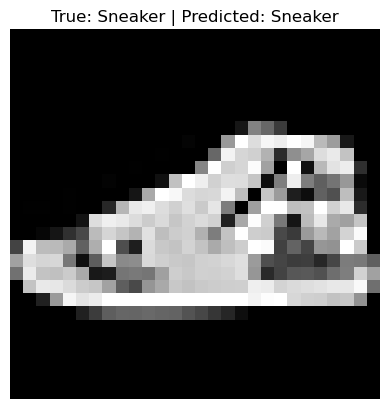

Przewidziana etykieta: Sneaker
Prawdziwa etykieta: Sneaker


In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Wczytanie modelu
def load_trained_model():
    model = tf.keras.models.load_model("model_fashion_mnist_augmented_final5.h5")
    return model

# Klasy Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#  Funkcja predykcji
def predict_and_show(image_index, X_test, y_test):
    model = load_trained_model()

    # Pobranie obrazu i prawdziwej etykiety
    image = X_test[image_index]
    true_label = np.argmax(y_test[image_index])

    # Przetworzenie obrazu dla modelu
    image_input = np.expand_dims(image, axis=0)  
    prediction = model.predict(image_input)  
    predicted_label = np.argmax(prediction)  

    #  Wyświetlenie obrazu i wyniku predykcji
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"True: {class_names[true_label]} | Predicted: {class_names[predicted_label]}")
    plt.axis("off")
    plt.show()

    print(f"Przewidziana etykieta: {class_names[predicted_label]}")
    print(f"Prawdziwa etykieta: {class_names[true_label]}")

#  Test działania
predict_and_show(0, X_test, y_test)  # Przetestuj predykcję dla pierwszego obrazu
